In [4]:
import pandas as pd

# 指定 Excel 檔案路徑
file_path = r'C:\Users\User\Dropbox\textmining1\Data_Clean\CSV\Merged.xlsx'

# 讀取特定工作表 "Opinion_Chunk"
sheet_name = "Opinion_Chunk"
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 嘗試動態匹配實際的 E 欄名稱
possible_columns = ['E', 'Chunk Text', 'Paragraph', 'Your_Column_Name']  # 添加可能的欄位名稱
target_column = None

for col in df.columns:
    if col.strip() in possible_columns:  # 去除多餘空格並匹配
        target_column = col
        break

# 確認是否找到目標欄位
if target_column:
    # 計算目標欄位的字數總和（排除空格）
    total_chars = df[target_column].dropna().apply(lambda x: len(str(x).replace(" ", ""))).sum()
    print(f"工作表 '{sheet_name}' 的字數總和（{target_column} 欄）為: {total_chars}")
else:
    print(f"工作表 '{sheet_name}' 不包含預期的欄位: {possible_columns}")

# 指定結果輸出路徑
output_path = r'C:\Users\User\Dropbox\textmining1\Data_Clean\CSV\Word_Count_Result.xlsx'

if target_column:
    result_df = pd.DataFrame({'工作表': [sheet_name], '字數總和': [total_chars]})
    result_df.to_excel(output_path, index=False)
    print(f"字數統計結果已保存至: {output_path}")

工作表 'Opinion_Chunk' 的字數總和（Chunk Text 欄）為: 679327037
字數統計結果已保存至: C:\Users\User\Dropbox\textmining1\Data_Clean\CSV\Word_Count_Result.xlsx


In [6]:
import pandas as pd

# 指定 Excel 檔案路徑
file_path = r'C:\Users\User\Dropbox\textmining1\Data_Clean\CSV\Merged.xlsx'

# 指定結果輸出路徑
output_path = r'C:\Users\User\Dropbox\textmining1\Data_Clean\CSV\Word_Count_Result1.xlsx'

# 定義每個工作表及其目標欄位
target_sheets = {
    'merge_CoreTerms': ['C', 'Core Terms'],
    'merged_HN': ['C', 'Column3', 'Content'],
    'merge_FN': ['D', 'Text'],
    'merge_Opinion': ['D', '內容'],
    'OPINION': ['D', 'Paragraph'],
    'Opinion_Chunk': ['D', 'Chunk Text']
}

# 建立一個結果列表
results = []

# 遍歷目標工作表和欄位
for sheet_name, columns in target_sheets.items():
    try:
        # 讀取指定工作表
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        
        # 建立存放結果的字典
        sheet_result = {'工作表': sheet_name}
        
        # 遍歷目標欄位
        for col in columns:
            if col in df.columns:
                # 計算字數總和（排除空格）
                total_chars = df[col].dropna().apply(lambda x: len(str(x).replace(" ", ""))).sum()
                sheet_result[col] = total_chars
            else:
                sheet_result[col] = '欄位不存在'
        
        # 將結果加入列表
        results.append(sheet_result)
    except Exception as e:
        # 如果工作表讀取失敗，記錄錯誤
        results.append({'工作表': sheet_name, '錯誤': str(e)})

# 將結果轉換為 DataFrame
result_df = pd.DataFrame(results)

# 保存結果到 Excel 文件
result_df.to_excel(output_path, index=False)

print(f"字數統計結果已保存至: {output_path}")


字數統計結果已保存至: C:\Users\User\Dropbox\textmining1\Data_Clean\CSV\Word_Count_Result1.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 指定 Excel 檔案路徑
file_path = r'C:\Users\User\Dropbox\textmining1\Data_Clean\CSV\Merged.xlsx'

# 定義每個工作表及其目標欄位
target_sheets = {
    'merge_CoreTerms': ['Core Terms'],
    'merged_HN': ['Column3'],
    'merge_FN': ['Text'],
    'merge_Opinion': ['內容'],
    'OPINION': ['Paragraph'],
    'Opinion_Chunk': ['Chunk Text']
}

# 建立圖表儲存路徑
chart_output_folder = r'C:\Users\User\Dropbox\textmining1\Data_Clean\CSV\Charts'

# 讀取每個工作表並計算字數
for sheet_name, columns in target_sheets.items():
    try:
        # 讀取工作表
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        
        for col in columns:
            if col in df.columns:
                # 計算每一列的字數
                char_counts = df[col].dropna().apply(lambda x: len(str(x).replace(" ", "")))
                
                # 繪製字數分布圖
                plt.figure(figsize=(10, 6))
                plt.hist(char_counts, bins=30, color='blue', alpha=0.7, edgecolor='black')
                plt.title(f"字數分布圖: 工作表 '{sheet_name}' 欄位 '{col}'")
                plt.xlabel("字數")
                plt.ylabel("頻率")
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                
                # 儲存圖表
                chart_output_path = f"{chart_output_folder}/{sheet_name}_{col}_distribution.png"
                plt.savefig(chart_output_path, dpi=300, bbox_inches='tight')
                plt.close()
                
                print(f"圖表已儲存: {chart_output_path}")
            else:
                print(f"工作表 '{sheet_name}' 不包含欄位 '{col}'")
    except Exception as e:
        print(f"無法處理工作表 '{sheet_name}'，錯誤: {str(e)}")


C:\Users\User\AppData\Local\Temp\ipykernel_3208\2957931532.py:37: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  plt.savefig(chart_output_path, dpi=300, bbox_inches='tight')
C:\Users\User\AppData\Local\Temp\ipykernel_3208\2957931532.py:37: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.savefig(chart_output_path, dpi=300, bbox_inches='tight')
C:\Users\User\AppData\Local\Temp\ipykernel_3208\2957931532.py:37: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  plt.savefig(chart_output_path, dpi=300, bbox_inches='tight')
C:\Users\User\AppData\Local\Temp\ipykernel_3208\2957931532.py:37: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.savefig(chart_output_path, dpi=300, bbox_inches='tight')
C:\Users\User\AppData\Local\Temp\ipykernel_3208\2957931532.py:37: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH

無法處理工作表 'merge_CoreTerms'，錯誤: [Errno 2] No such file or directory: 'C:\\Users\\User\\Dropbox\\textmining1\\Data_Clean\\CSV\\Charts/merge_CoreTerms_Core Terms_distribution.png'


C:\Users\User\AppData\Local\Temp\ipykernel_3208\2957931532.py:37: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  plt.savefig(chart_output_path, dpi=300, bbox_inches='tight')
C:\Users\User\AppData\Local\Temp\ipykernel_3208\2957931532.py:37: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.savefig(chart_output_path, dpi=300, bbox_inches='tight')
C:\Users\User\AppData\Local\Temp\ipykernel_3208\2957931532.py:37: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  plt.savefig(chart_output_path, dpi=300, bbox_inches='tight')
C:\Users\User\AppData\Local\Temp\ipykernel_3208\2957931532.py:37: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.savefig(chart_output_path, dpi=300, bbox_inches='tight')
C:\Users\User\AppData\Local\Temp\ipykernel_3208\2957931532.py:37: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH

無法處理工作表 'merged_HN'，錯誤: [Errno 2] No such file or directory: 'C:\\Users\\User\\Dropbox\\textmining1\\Data_Clean\\CSV\\Charts/merged_HN_Column3_distribution.png'


c:\Users\User\Dropbox\textmining1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\Dropbox\textmining1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\Dropbox\textmining1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\Dropbox\textmining1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\Dropbox\textmining1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: G

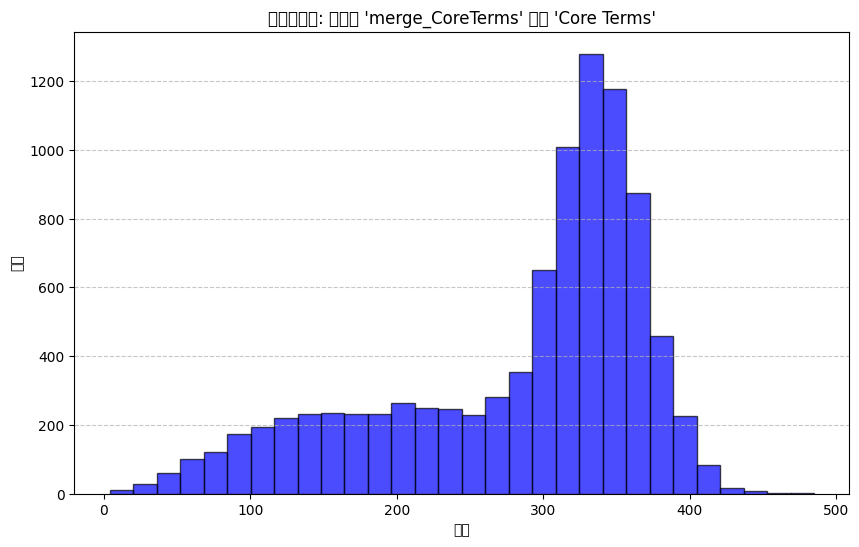

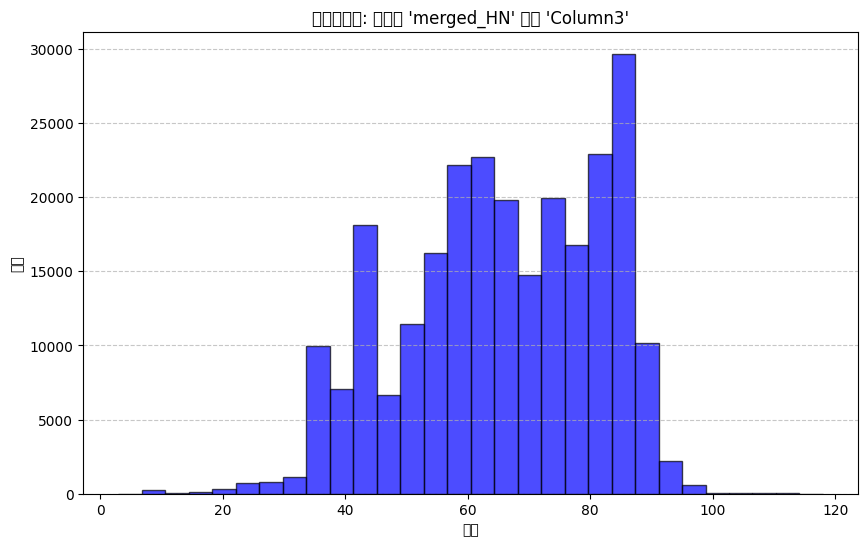

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 指定 Excel 檔案路徑
file_path = r'C:\Users\User\Dropbox\textmining1\Data_Clean\CSV\Merged.xlsx'

# 定義每個工作表及其目標欄位
target_sheets = {
    'merge_CoreTerms': ['Core Terms'],
    'merged_HN': ['Column3']
}

# 建立圖表儲存路徑
chart_output_folder = r'C:\Users\User\Dropbox\textmining1\Data_Clean\CSV\Charts'

# 讀取每個工作表並計算字數
for sheet_name, columns in target_sheets.items():
    try:
        # 讀取工作表
        df = pd.read_excel(file_path, sheet_name=sheet_name)
        
        for col in columns:
            if col in df.columns:
                # 計算每一列的字數
                char_counts = df[col].dropna().apply(lambda x: len(str(x).replace(" ", "")))
                
                # 繪製字數分布圖
                plt.figure(figsize=(10, 6))
                plt.hist(char_counts, bins=30, color='blue', alpha=0.7, edgecolor='black')
                plt.title(f"字數分布圖: 工作表 '{sheet_name}' 欄位 '{col}'")
                plt.xlabel("字數")
                plt.ylabel("頻率")
                plt.grid(axis='y', linestyle='--', alpha=0.7)
                
                # 儲存圖表
                chart_output_path = f"{chart_output_folder}/{sheet_name}_{col}_distribution.png"
                plt.savefig(chart_output_path, dpi=300, bbox_inches='tight')
                plt.close()
                
                print(f"圖表已儲存: {chart_output_path}")
            else:
                print(f"工作表 '{sheet_name}' 不包含欄位 '{col}'")
    except Exception as e:
        print(f"無法處理工作表 '{sheet_name}'，錯誤: {str(e)}")


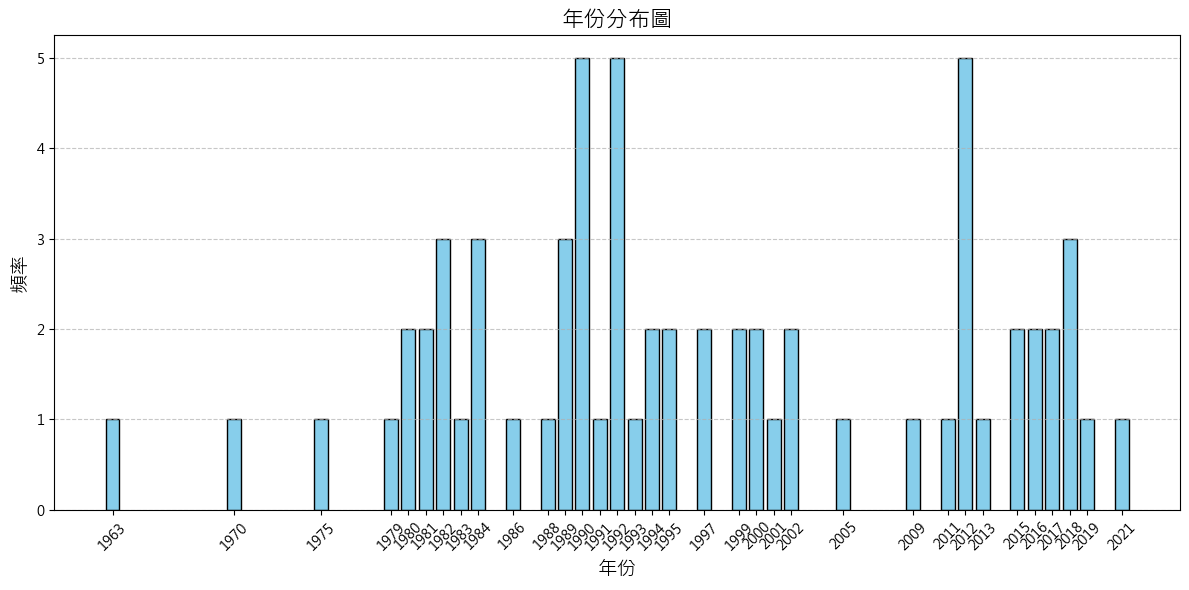

年份分布圖已成功生成並儲存！


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from matplotlib import rcParams

# 設置支援繁體中文的字體
rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 微軟正黑體
rcParams['axes.unicode_minus'] = False  # 確保負號正常顯示

# 原始數據
data = [
    "a5 25, 1963", "a7 30, 1970", "b10 47, 1984", "b10 75, 1984", "b10 89, 1984", 
    "b2 4, 1975", "b3 54, 1979", "b4 32, 1980", "b6 53, 1980-1982", "b6 66, 1981",
    "b7 65, 1982", "b7 83, 1982", "b9 58, 1983", "c1 30, 1991", "c10 30, 1990",
    "c10 30, 1990", "c10 46, 1990", "c10 70, 1990", "c4 32, 1986", "c9 17, 1989",
    "c9 39, 1988-1989", "c9 84, 1989", "c9 93, 1990", "f2 47, 1992", "f2 80, 1992",
    "f3 3, 1992", "f3 16, 1992", "f3 41, 1992", "f4 94, 1993", "f5 14, 1994",
    "f6 58, 1994-1995", "f7 50, 1995", "f9 64, 1997", "f9 93, 1997", "g3 67, 2005",
    "e2 78, 1999", "e3 58, 1999", "e5 24, 2000", "e5 50, 2000", "e5 100, 2001",
    "e7 57, 2002", "e7 82, 2002", "h10 20, 2012", "h10 48, 2012", "h10 98, 2013",
    "h3 38, 2009", "h6 44, 2011", "h8 70, 2012", "h9 5, 2012", "h9 88, 2012",
    "i2 31, 2017", "i3 3, 2017", "i4 25, 2018", "i4 34, 2018", "i6 60, 2019",
    "i3 73, 2018", "j5 84, 2015", "j7 43, 2015", "j9 36, 2016", "j9 79, 2016",
    "k2 5, 2021"
]

# 提取年份
years = []
for item in data:
    match = re.search(r'\b(\d{4})(-\d{4})?\b', item)
    if match:
        if match.group(2):  # 處理範圍年份（如 1980-1982）
            start_year, end_year = map(int, match.group(0).split('-'))
            years.extend(range(start_year, end_year + 1))
        else:
            years.append(int(match.group(1)))

# 計算年份分布
year_counts = Counter(years)

# 將結果轉換為 DataFrame
year_df = pd.DataFrame.from_dict(year_counts, orient='index', columns=['Count']).reset_index()
year_df.columns = ['Year', 'Count']
year_df = year_df.sort_values(by='Year')

# 繪製年份分布圖
plt.figure(figsize=(12, 6))
plt.bar(year_df['Year'], year_df['Count'], color='skyblue', edgecolor='black')
plt.title('年份分布圖', fontsize=16)
plt.xlabel('年份', fontsize=14)
plt.ylabel('頻率', fontsize=14)
plt.xticks(year_df['Year'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 保存圖表
plt.savefig(r'C:\Users\User\Dropbox\textmining1\Data_Clean\Year_Distribution.png', dpi=300)
plt.show()

print("年份分布圖已成功生成並儲存！")


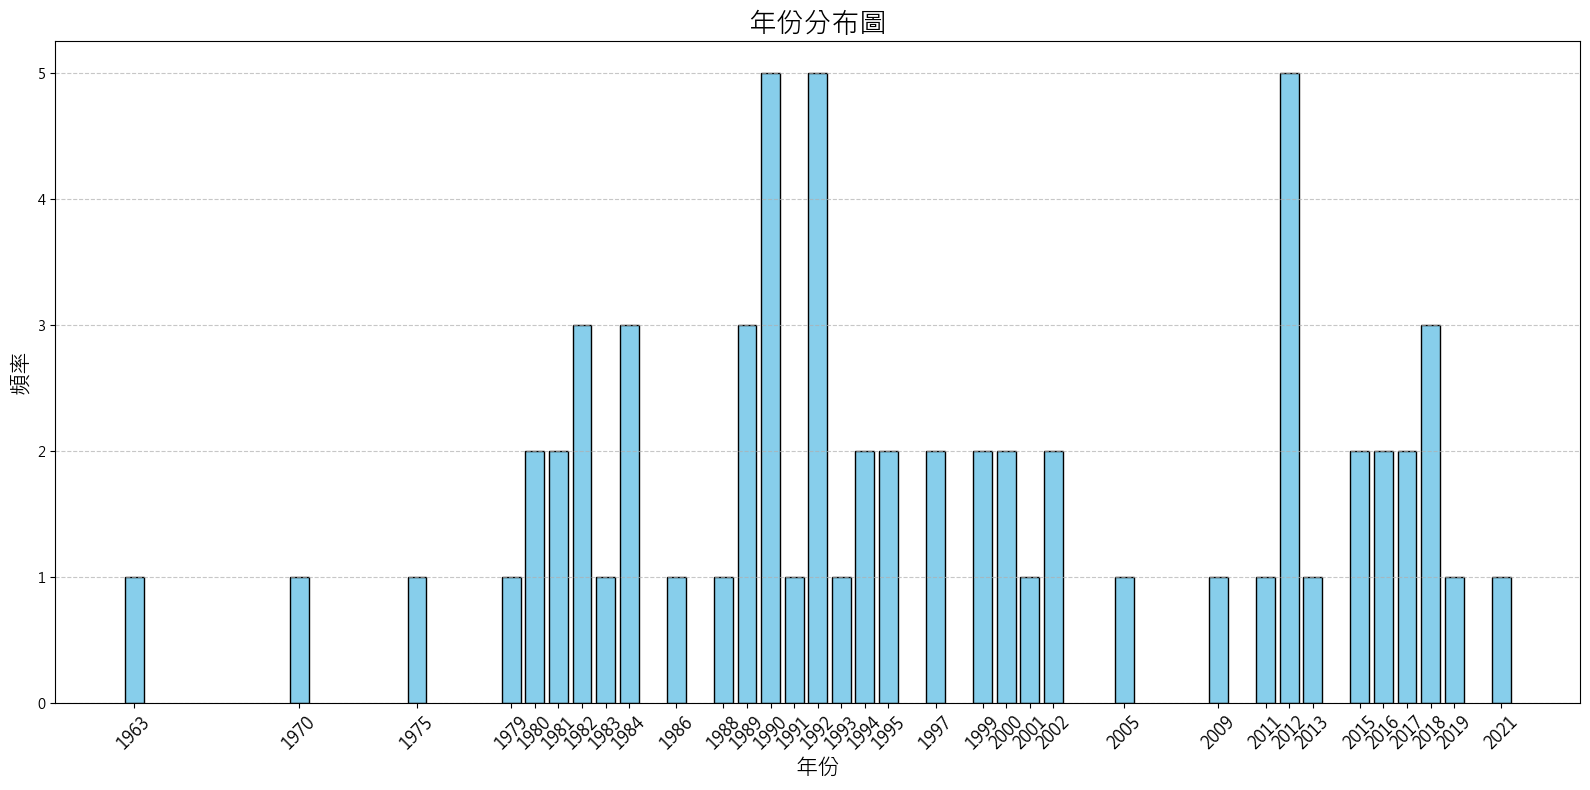

年份分布圖已成功生成並儲存！


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from matplotlib import rcParams

# 設置支援繁體中文的字體
rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 微軟正黑體
rcParams['axes.unicode_minus'] = False  # 確保負號正常顯示

# 原始數據
data = [
    "a5 25, 1963", "a7 30, 1970", "b10 47, 1984", "b10 75, 1984", "b10 89, 1984",
    "b2 4, 1975", "b3 54, 1979", "b4 32, 1980", "b6 53, 1980-1982", "b6 66, 1981",
    "b7 65, 1982", "b7 83, 1982", "b9 58, 1983", "c1 30, 1991", "c10 30, 1990",
    "c10 30, 1990", "c10 46, 1990", "c10 70, 1990", "c4 32, 1986", "c9 17, 1989",
    "c9 39, 1988-1989", "c9 84, 1989", "c9 93, 1990", "f2 47, 1992", "f2 80, 1992",
    "f3 3, 1992", "f3 16, 1992", "f3 41, 1992", "f4 94, 1993", "f5 14, 1994",
    "f6 58, 1994-1995", "f7 50, 1995", "f9 64, 1997", "f9 93, 1997", "g3 67, 2005",
    "e2 78, 1999", "e3 58, 1999", "e5 24, 2000", "e5 50, 2000", "e5 100, 2001",
    "e7 57, 2002", "e7 82, 2002", "h10 20, 2012", "h10 48, 2012", "h10 98, 2013",
    "h3 38, 2009", "h6 44, 2011", "h8 70, 2012", "h9 5, 2012", "h9 88, 2012",
    "i2 31, 2017", "i3 3, 2017", "i4 25, 2018", "i4 34, 2018", "i6 60, 2019",
    "i3 73, 2018", "j5 84, 2015", "j7 43, 2015", "j9 36, 2016", "j9 79, 2016",
    "k2 5, 2021"
]

# 提取年份
years = []
for item in data:
    match = re.search(r'\b(\d{4})(-\d{4})?\b', item)
    if match:
        if match.group(2):  # 處理範圍年份（如 1980-1982）
            start_year, end_year = map(int, match.group(0).split('-'))
            years.extend(range(start_year, end_year + 1))
        else:
            years.append(int(match.group(1)))

# 計算年份分布
year_counts = Counter(years)

# 將結果轉換為 DataFrame
year_df = pd.DataFrame.from_dict(year_counts, orient='index', columns=['Count']).reset_index()
year_df.columns = ['Year', 'Count']
year_df = year_df.sort_values(by='Year')

# 繪製年份分布圖
plt.figure(figsize=(16, 8))  # 增大圖形大小
plt.bar(year_df['Year'], year_df['Count'], color='skyblue', edgecolor='black')
plt.title('年份分布圖', fontsize=20)
plt.xlabel('年份', fontsize=16)
plt.ylabel('頻率', fontsize=16)
plt.xticks(year_df['Year'], rotation=45, fontsize=12)  # 設置 X 軸年份的間距和字體大小
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 保存圖表
plt.savefig(r'C:\Users\User\Dropbox\textmining1\Data_Clean\Year_Distribution_Wide.png', dpi=300)
plt.show()

print("年份分布圖已成功生成並儲存！")


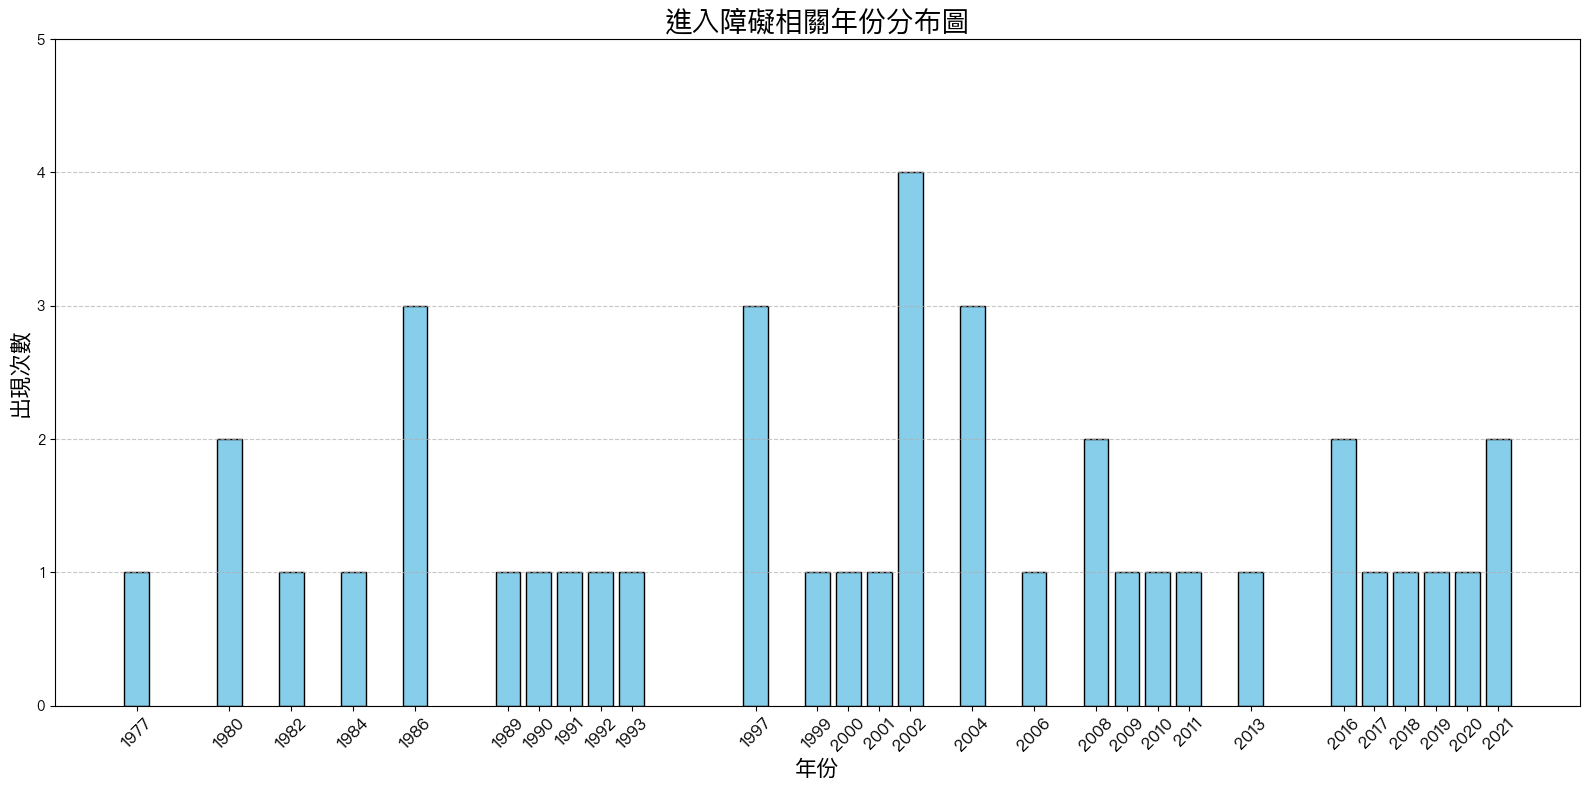

✅ 年份分布圖已成功生成並儲存！


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
from matplotlib import rcParams

# 嘗試使用 macOS 上存在的繁體字體
rcParams['font.sans-serif'] = ['PingFang HK']  # ← 或改成 'Heiti TC', 'LiHei Pro', etc.
rcParams['axes.unicode_minus'] = False

# 將 Core Terms、HN、FN 的資料合併
data = [
    # Core Terms
    "c5 19, 1986",

    # HN
    "c1 59, 1991", "c5 9, 1986", "c5 29, 1986", "d6 ,1977", "d17 ,2018", "e8 2, 2002",
    "e8 73, 2002", "f4 98, 1993", "f9, 66, 1997", "f10, 1, 1997", "f10, 43, 1997",
    "g3, 17, 2004", "g10, 8, 2008", "h1, 42, 2013", "h8, 29, 2011", "i1, 50, 2021",
    "i2, 33, 2017", "i10 68, 2021", "j8 97, 2016", "j9 32, 2016",

    # FN
    "b1 13, 1984", "b4 66, 1980", "b6 53, 1980", "b8 81, 1982", "c1 1, 1990",
    "c9 25, 1989", "e1 2, 2004", "e3 1999", "e4 2000", "e5 , 2001", "e7, 2002",
    "e8, 2002", "e10, 2004", "f3, 1992", "g3 99, 2006", "g10 79, 2008",
    "h3 56, 2009", "h4 39, 2010", "i7 91, 2019", "i8 46, 2020"
]

# 提取年份
years = []
for item in data:
    match = re.search(r'\b(\d{4})(-\d{4})?\b', item)
    if match:
        if match.group(2):  # 處理範圍年份（如 1980-1982）
            start_year, end_year = map(int, match.group(0).split('-'))
            years.extend(range(start_year, end_year + 1))
        else:
            years.append(int(match.group(1)))

# 計算年份分布
year_counts = Counter(years)

# 轉為 DataFrame 並排序
year_df = pd.DataFrame.from_dict(year_counts, orient='index', columns=['Count']).reset_index()
year_df.columns = ['Year', 'Count']
year_df = year_df.sort_values(by='Year')

# 繪製年份分布圖
plt.figure(figsize=(16, 8))
plt.bar(year_df['Year'], year_df['Count'], color='skyblue', edgecolor='black')
plt.title('進入障礙相關年份分布圖', fontsize=20)
plt.xlabel('年份', fontsize=16)
plt.ylabel('出現次數', fontsize=16)
plt.xticks(year_df['Year'], rotation=45, fontsize=12)
plt.yticks(range(0, year_df['Count'].max() + 2))  # 每次+1，確保有完整刻度
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# 儲存圖檔
plt.savefig('/Users/tangjiahong/Dropbox/textmining1/Year_Distribution_Wide.png', dpi=300)
plt.show()

print("✅ 年份分布圖已成功生成並儲存！")


In [7]:
import matplotlib.font_manager as fm

for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
    print(fm.FontProperties(fname=font).get_name())


Heiti TC
Padyakke Expanded One
Lava Kannada
Gurmukhi Sangam MN
PilGi
STIXNonUnicode
K2D
Noto Sans Buginese
Sama Devanagari
Noto Sans Avestan
Xingkai SC
KoHo
Noto Sans Coptic
STIXSizeTwoSym
Hiragino Maru Gothic Pro
Krungthep
.Keyboard
Bodoni 72 Smallcaps
Hiragino Sans
Noto Sans Sundanese
October Devanagari
Devanagari Sangam MN
Noto Sans New Tai Lue
Mukta Mahee
Baloo Thambi 2
Noto Sans Lycian
Maku
Toppan Bunkyu Mincho
Avenir
BM Hanna Pro
Noto Sans Kayah Li
PSL Ornanong Pro
Shobhika
PT Sans
BiauKaiHK
Lao MN
Noto Sans Myanmar
Cambay Devanagari
Noto Sans Old Hungarian
Devanagari MT
Verdana
Trattatello
Plantagenet Cherokee
STIX Two Math
.SF Georgian Rounded
YuGothic
.SF NS Rounded
Al Nile
Noto Sans Masaram Gondi
Srisakdi
Baloo Tamma 2
Lava Devanagari
STIXSizeThreeSym
Hei
Noto Sans Pahawh Hmong
Sama Gujarati
Trebuchet MS
STIXIntegralsUp
Kannada MN
Hiragino Sans
Times New Roman
STIXIntegralsUpD
Mukta Vaani
Tiro Bangla
Academy Engraved LET
.LastResort
Bodoni Ornaments
Baloo Bhaijaan
Avenir Next

RuntimeError: In FT2Font: Could not set the fontsize (invalid pixel size; error code 0x17)